# Classification des joueurs NBA 

L’objectif est de fournir un classifier permettant de prédire
qu’un joueur vaut le coup d’investir sur lui car il va durer plus de 5 ans en NBA en s’appuyant
sur ses statistiques sportives. Ce modèle vise a conseiller des investisseur cherchant a
capitaliser sur de futurs talents de la NBA.

Pour cela, on analyse les données nba_logreg.csv. Ce fichier contient


GP: Games Played

MIN: Minutes Played

PTS: Number of points per game

FGM: Field goals made

FGA: Field goals attempt

FG%: field goals percent

3P Made: 3 point made

3PA: 3 points attempt

3P%: 3 point percent

FTM: Free throw made

FTA: Free throw attempts

FT%: Free throw percent

OREB: Offensive rebounds

DREB: Defensive rebounds

REB: Rebounds

AST: Assists

STL: Steals

BLK: Blocks

TOV: Turnovers

Target: 0 if career years played < 5, 1 if career years played >= 5


# Analyse exploratoire des données

Dans un premier temps, on va faire une analyse des données, regarder s'il manque des données, s'il y a des outliers et faire quelques graphes pour mieux comprendre les données.
Je vais d'abord charger les librairies ainsi charger ma configuration pour les plots. J'aime en particulier avoir les axes gras pour que le plot soit facilement visibile par tout le monde lors de présentations orales.

Pour cette partie j'utilise matplolib,seaborn.

In [1]:
#Import libraries used for the EDA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None)

# Function to use my plotting configuration
def configuration_plot():
    plt.rcParams.update({
        'legend.numpoints': 1,
        'xtick.major.size': 21,
        'xtick.minor.size': 5,
        'ytick.major.size': 21,
        'ytick.minor.size': 5,
        'xtick.minor.visible': True,
        'text.usetex': False,
        'axes.linewidth': 2,
        'axes.labelsize': 20,
        'ytick.labelsize': 16,
        'xtick.labelsize': 16,
        'ytick.direction': 'inout',
        'xtick.direction': 'inout',
        'xtick.major.top': True,
        'xtick.major.bottom': True,
        'xtick.minor.top': True,
        'xtick.minor.bottom': True,
        'ytick.major.left': True,
        'ytick.major.right': True,
        'ytick.minor.left': True,
        'ytick.minor.right': True,
        'font.weight': 'bold',
        'axes.labelweight': 'heavy',
        'figure.titleweight': 'heavy'
    })

configuration_plot()

In [2]:
# On charge les données
df = pd.read_csv("data/nba_logreg.csv")
#On regarde les 5 premieres lignes pour avoir une idée des données
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [3]:
# On regarde la taille du dataframe
print(df.shape)

(1340, 21)


In [4]:
# On regarde la nature des feature (float, str, etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

On remarque que toutes les données sont numériques (à part le nom des joueurs) ce qui va nous simplifier la chose. On aura pas besoin de
faire des transformations du type labeloneencoder. On appliquera juste une uniformisation des données pour éviter un biais lorsque la plage de valeurs des features est différente. On peut utiliser MinMaxScaler (uniformisé entre 0 et 1) ou SandardScaler (moyenne =0, std=1).

A noter, qu'il manque 11 valeur pour le pourcentage de 3pts.

In [5]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


On ne voit pas de valeurs bizarre à première vue. Exemple, le nombre de minutes jouées minimum est bien différent de 0.

In [6]:
# On verifie les valeurs manquantes ou null
df.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

On retrouve qu'il manque 11 valeurs pour le pourcentage de 3pts. Cela represente  seulement 0.82% du total des données. On pourrait remplacer par la moyenne, mettre 0 comme dans le test.py, ou utiliser d'autres programmes de machine learning (e.g. KNN) mais pour si peu de données ca ne vaut pas le coup. Je decide donc d'enlever les 11 lignes pour lesquelles le % de 3pts manque. Je ne mets pas 0 car ca pourrait 

In [7]:
# Regarding the fact the other missing values correspond to a maximum of only 32 rows, and to avoid
# to remplace by the mean which could introduce bias, I remove them
df=df.dropna()
df.isnull().sum()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

**conclusions:** Nous avons un dataset sans valeur manquante.

In [8]:
#Je decide de renommer TARGET_5Yrs en target_5yrs et3P Made en 3PM pour que ca soit moins lourd à écrire.
df=df.rename(columns={'TARGET_5Yrs': 'target_5yrs', '3P Made': '3PM'})                         

Nous devons aussi verifier qu'il n y a pas plusieurs fois le même joueur dans le data set.

In [9]:
duplicate = df.drop(columns=['target_5yrs']).duplicated(keep=False)
print(df[duplicate])  # Affiche les doublons


                  Name  GP   MIN   PTS  FGM   FGA   FG%  3PM  3PA   3P%  FTM  \
18       Larry Johnson  82  37.2  19.2  7.5  15.3  49.0  0.1  0.3  22.7  4.1   
19       Larry Johnson  82  37.2  19.2  7.5  15.3  49.0  0.1  0.3  22.7  4.1   
71           Dee Brown  82  23.7   8.7  3.5   7.5  46.4  0.1  0.4  20.6  1.7   
72           Dee Brown  82  23.7   8.7  3.5   7.5  46.4  0.1  0.4  20.6  1.7   
73           Dee Brown  49   9.2   1.9  0.7   2.0  32.7  0.1  0.6  21.4  0.5   
74           Dee Brown  49   9.2   1.9  0.7   2.0  32.7  0.1  0.6  21.4  0.5   
120       Tim Hardaway  79  33.7  14.7  5.9  12.5  47.1  0.3  1.1  27.4  2.7   
121       Tim Hardaway  79  33.7  14.7  5.9  12.5  47.1  0.3  1.1  27.4  2.7   
126          Glen Rice  77  30.0  13.6  6.1  13.9  43.9  0.2  0.9  24.6  1.2   
127          Glen Rice  77  30.0  13.6  6.1  13.9  43.9  0.2  0.9  24.6  1.2   
156      Michael Smith  65   9.5   5.0  2.1   4.4  47.6  0.0  0.4   7.1  0.8   
157      Michael Smith  65   9.5   5.0  

En analysant les données, je me suis rendu compte que:

On peut aussi avoir un même nom (e.g. Charles Smith) mais différentes statistiques. Il se peut qu'il y ait 2 personnes avec le même nom. Je decide donc de supprimer seulement les doublons pour lesquelles les 2 lignes sont identiques pour ttes les features.

On peut avoir le même noms, les même stats mais avoir une target 1 et 0. La même personne avec les même stats a deux labels différents. Je decide de les supprimer

In [10]:
# Identifier les doublons en ignorant la colonne 'target'
indices_to_remove = df[duplicate].index
df=df.drop(index=indices_to_remove)
print(df)

                 Name  GP   MIN  PTS  FGM  FGA   FG%  3PM  3PA   3P%  FTM  \
0      Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7  0.5  2.1  25.0  1.6   
1     Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6  0.7  2.8  23.5  2.6   
2      JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2  0.4  1.7  24.4  0.9   
3         Malik Sealy  58  11.6  5.7  2.3  5.5  42.6  0.1  0.5  22.6  0.9   
4         Matt Geiger  48  11.5  4.5  1.6  3.0  52.4  0.0  0.1   0.0  1.3   
...               ...  ..   ...  ...  ...  ...   ...  ...  ...   ...  ...   
1333    Byron Houston  79  16.1  5.3  1.8  4.1  44.6  0.0  0.1  28.6  1.6   
1336      Brent Price  68  12.6  3.9  1.5  4.1  35.8  0.1  0.7  16.7  0.8   
1337     Marlon Maxey  43  12.1  5.4  2.2  3.9  55.0  0.0  0.0   0.0  1.0   
1338  Litterial Green  52  12.0  4.5  1.7  3.8  43.9  0.0  0.2  10.0  1.2   
1339        Jon Barry  47  11.7  4.4  1.6  4.4  36.9  0.4  1.3  33.3  0.7   

      FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  target_5yrs  
0     2

## Les données sont elles balancées? 

En classification, il est très important de vérifier que les données sont balancées, c'est à dire qu'il a la même quantité de target 0 et 1. En effet si on a 80% de 0 et seulement 20% de 1, il suffit d'avoir un modèle qui prédit toujours 0 et on aura un précision de 80%.
Ici on va regarder le nombre de fois que target=0 et =1.

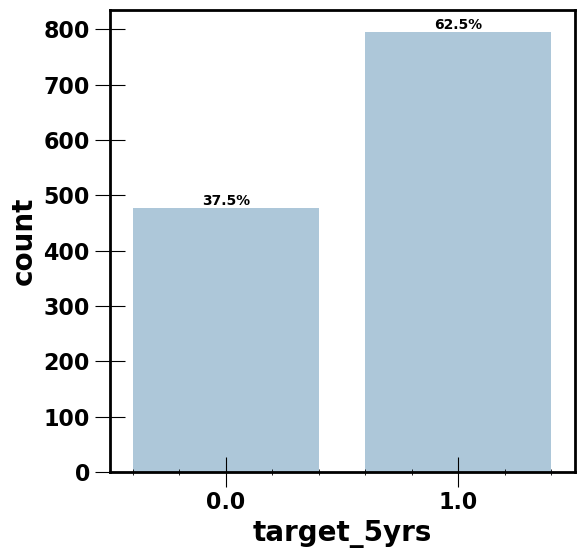

In [11]:

plt.figure(figsize=(6,6))
ax=sns.countplot(x='target_5yrs', data=df,alpha=0.4)
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.1f}%'  # Calcul du pourcentage
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')  # Ajout du texte

# Affichage des labels de barres
plt.show()

In [12]:
#En pourcentage
df['target_5yrs'].value_counts()/len(df)

target_5yrs
1.0    0.625
0.0    0.375
Name: count, dtype: float64

**Conclusion:** On a 62% de données qui ont une target=1 et 38% target=0. Le jeu de données n'est pas trop balancé et donc je decide ne pas utiliser de technique de balancement des données (resampling ou smote) 

Ce qui nous intéresse c'est la colonne target_5yr, qu'on doit determiner à partir des features. Une bonne idée serait de regarder pour chaque feature, la moyenne des joueurs qui ont >5yr et <5yr.

In [13]:
mean_values = df.drop(columns=['Name']).groupby('target_5yrs').mean(numeric_only=True).transpose()

print(mean_values)

target_5yrs        0.0        1.0
GP           50.696017  65.968553
MIN          14.023480  19.743522
PTS           4.927463   7.898113
FGM           1.899581   3.052453
FGA           4.462683   6.715472
FG%          42.168344  45.312579
3PM           0.234382   0.263019
3PA           0.765828   0.803145
3P%          19.550734  19.372830
FTM           0.895597   1.531572
FTA           1.281132   2.135220
FT%          69.027883  71.224025
OREB          0.699371   1.190943
DREB          1.490985   2.333962
REB           2.188260   3.524277
AST           1.181971   1.759371
STL           0.488470   0.693082
BLK           0.247379   0.441006
TOV           0.917191   1.348553


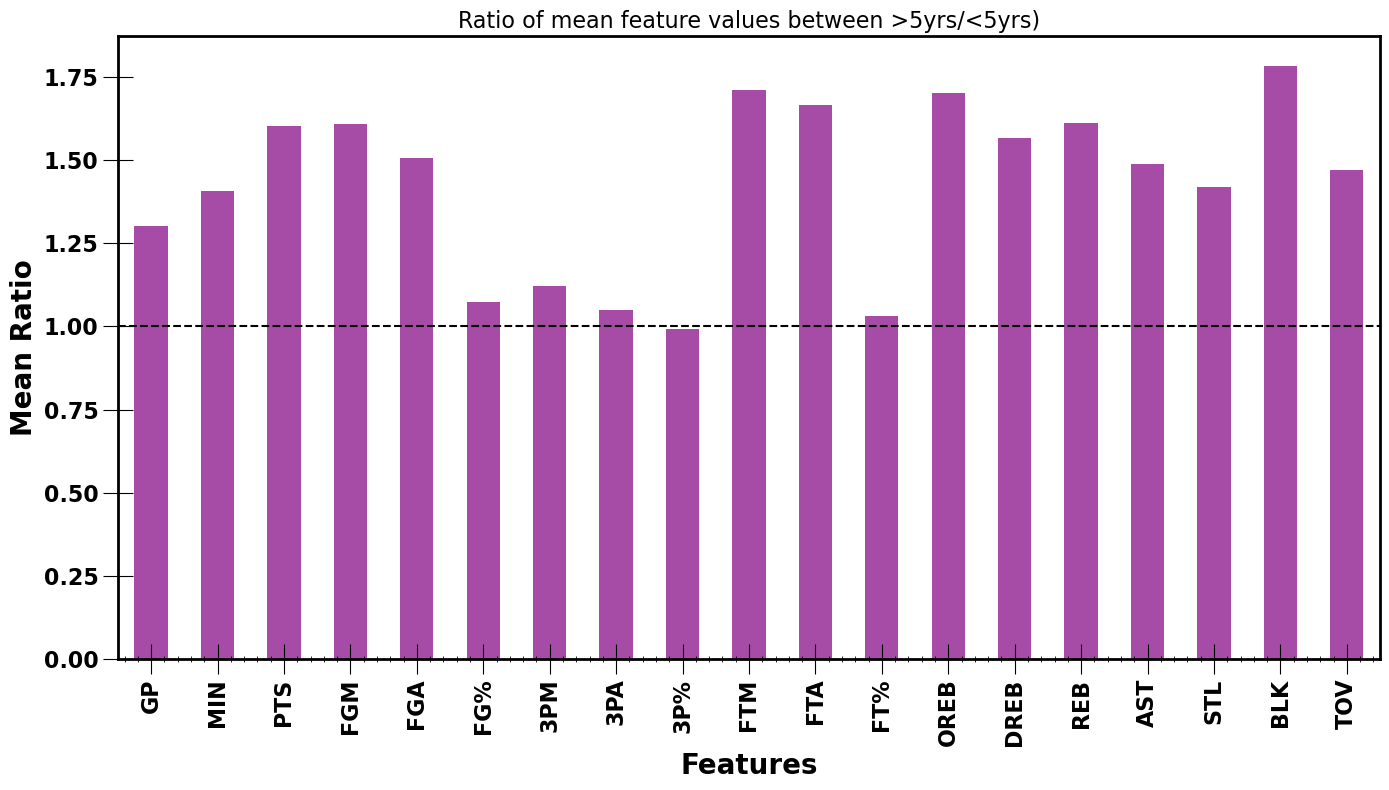

In [14]:
# Graphiquement
mean_ratio = mean_values[1] / mean_values[0]

plt.figure(figsize=(14, 8))
mean_ratio.plot(kind='bar', color='purple', alpha=0.7)

# Add titles and labels
plt.title('Ratio of mean feature values between >5yrs/<5yrs)', fontsize=16)
plt.xlabel('Features')
plt.ylabel('Mean Ratio')
plt.axhline(1, color='black', linestyle='--')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Avec ce graphe, on voir clairement les features importantes. Par exemple, le nombre de points, Field goals made, les blocks sont très différents entre les joueurs qui ont joué plus ou moins de 5 ans en NBA.

Maintenant on peut s'amuser à prendre une feature, par exemple le nombre de pts et verifier que la différence est statistiquement signitficative.

H0: Il n'y a pas de différence significative dans le nombre de points entre les joueurs ayant joué >5yrs et <5yrs

H1:  Il y a une différence significative dans le nombre de points entre les deux.

In [15]:
# On selectionne les 2 groupes
group_0 = df[df['target_5yrs'] == 0]['PTS']
group_1 = df[df['target_5yrs'] == 1]['PTS']
from statsmodels.stats.weightstats import ztest
z_statistic, p_value = ztest(group_0, group_1)
# Affichage des résultats
print(f'Z-test: Z-statistic = {z_statistic}, p-value = {p_value}')

Z-test: Z-statistic = -12.607020006155414, p-value = 1.9315942496686868e-36


La p-value est largement inférieure au niveau de confiance typique (0.05), on peut donc rejeter HO, il y a bien une différence significative entre les 2 groupes concernant le nombre de points.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 2000x600 with 0 Axes>

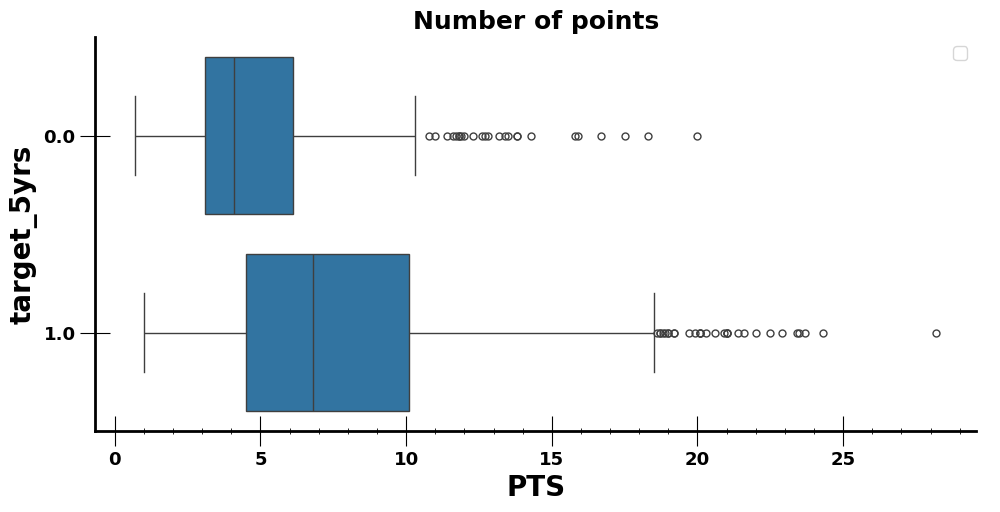

In [16]:
plt.figure(figsize=(20,6))
sns.catplot(kind='box', x='PTS', y='target_5yrs', orient='h', data=df, aspect=2);
plt.title('Number of points', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)
# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

La figure box est un autre moyen de voir cette différence. On voit la mediane, le percentile 25% et 75%, les valeurs min et max excluant les outliers représentés par les cercles. On va maintenant verifier le nombre de outliers et les enlever.



### Check outliers 

Je vais utiliser le Z-score pour détecter les valeurs aberrantes dans nos caractéristiques. Tous les points avec un abs(Z-score) > 3 sont considérés comme des valeurs aberrantes. Cela s'explique par le fait que, en supposant une distribution normale, environ 99,7 % des points de données auront des Z-scores compris entre -3 et 3.

In [17]:
# On calcule le z-score pour toutes les features sauf name/target
from scipy.stats import zscore
z_scores = df.drop(columns=['Name','target_5yrs']).apply(zscore)

# Outliers sont ceux avec z-score > 3 ou < -3
outliers_zscore = (z_scores.abs() > 3)

# On compte les outliers dans chaque feature
outliers_zscore_count = outliers_zscore.sum()

# On montre les resultats
outliers_zscore_count.sort_values(ascending=False)

AST     30
3PM     27
BLK     26
3PA     26
FTM     23
FTA     23
TOV     22
DREB    22
OREB    21
PTS     21
STL     19
REB     18
FGM     18
FGA     17
FT%     12
FG%      7
3P%      4
MIN      0
GP       0
dtype: int64

In [18]:
df[outliers_zscore.any(axis=1)]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,target_5yrs
12,Lorenzo Williams,27,6.6,1.3,0.6,1.3,47.2,0.0,0.0,0.0,0.1,0.3,28.6,0.6,1.4,2.0,0.2,0.2,0.6,0.3,1.0
22,Mark Macon,76,30.3,10.6,4.4,11.7,37.5,0.1,0.4,13.3,1.8,2.4,73.0,1.1,1.8,2.9,2.2,2.0,0.2,2.0,1.0
45,Pete Chilcutt,69,11.8,3.6,1.6,3.6,45.2,0.0,0.0,100.0,0.3,0.4,82.1,1.1,1.6,2.7,0.6,0.5,0.3,0.6,1.0
61,Stephen Thompson,19,4.8,1.6,0.7,1.9,37.8,0.0,0.1,0.0,0.2,0.4,37.5,0.6,0.4,1.0,0.4,0.3,0.2,0.3,0.0
63,Lionel Simmons,79,37.7,18.0,6.9,16.5,42.2,0.0,0.1,27.3,4.1,5.5,73.6,2.4,6.4,8.8,4.0,1.4,1.1,2.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,Shaquille O'Neal*,81,37.9,23.4,9.0,16.1,56.2,0.0,0.0,0.0,5.3,8.9,59.2,4.2,9.6,13.9,1.9,0.7,3.5,3.8,1.0
1310,Christian Laettner,81,34.9,18.2,6.2,13.1,47.4,0.0,0.5,10.0,5.7,6.8,83.5,2.1,6.6,8.7,2.8,1.3,1.0,3.4,1.0
1311,Tom Gugliotta,81,34.5,14.7,6.0,14.0,42.6,0.5,1.7,28.1,2.2,3.5,64.4,2.7,6.9,9.6,3.8,1.6,0.4,2.8,1.0
1312,Alonzo Mourning*,78,33.9,21.0,7.3,14.3,51.1,0.0,0.0,0.0,6.3,8.1,78.1,3.4,6.9,10.3,1.0,0.3,3.5,3.0,1.0


Je connais Shaquille O'Neal, donc je suis curieux de savoir pourquoi c'est un outlier. Je vais regarder plus en détails ceci.

In [19]:
df_shaq=df[df.index==1308]
df_shaq

,Name,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,target_5yrs
1308,Shaquille O'Neal*,81,37.9,23.4,9.0,16.1,56.2,0.0,0.0,0.0,5.3,8.9,59.2,4.2,9.6,13.9,1.9,0.7,3.5,3.8,1.0


In [20]:
outliers_shaq=outliers_zscore[df.index==1308]
outliers_shaq

,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
1308,False,False,True,True,False,False,False,False,False,True,True,False,True,True,True,False,False,True,True


Shaquille O'Neal a été signalé outlier par exemple à cause de son nombre de point ou les blocks. Néanmoins, ceci n'est pas un outlier. Shaq était un très grand joueur, qui était capable de marquer beaucoup de points et très fort en défense. Ne connaissant pas tous les joueurs, je prefère ne pas enlever les outliers. 

### Check correlations

Pour cela, je vais construire une matrice de corrélation et la tracer.


<Axes: >

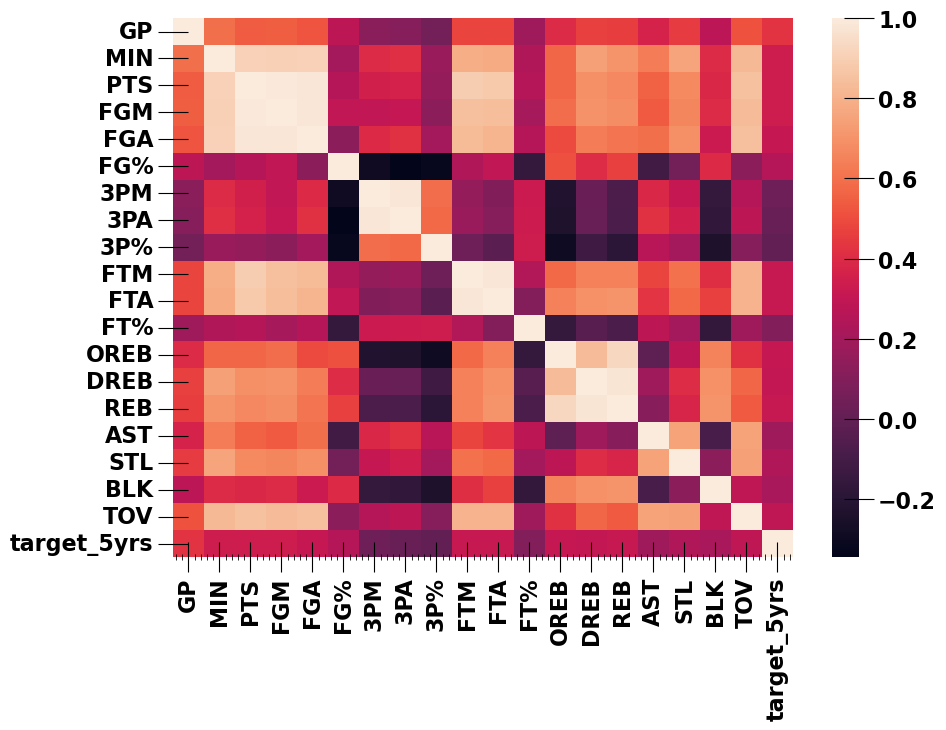

In [21]:
df_corr=df.drop(columns='Name')
plt.figure(figsize=(10,7))
df_corr = df_corr.corr()
sns.heatmap(df_corr)

In [22]:
#regardons les corrélation les plus importantes avec notre target
correlations = df_corr['target_5yrs'][(df_corr['target_5yrs'] > 0.2) | (df_corr['target_5yrs'] < -0.2)]
print(correlations)

GP             0.424431
MIN            0.334613
PTS            0.333508
FGM            0.335429
FGA            0.307023
FG%            0.249910
FTM            0.314998
FTA            0.314665
OREB           0.307478
DREB           0.301424
REB            0.316078
STL            0.241752
BLK            0.216741
TOV            0.290833
target_5yrs    1.000000
Name: target_5yrs, dtype: float64


**Conclusions** Grace à la matrice de corrélation, on voit que le nombre d'années en NBA dépend en particulier de

-> Nombre de matchs joués
-> Field goals made

Comme attendu, on voit aussi que certaines feature sont très correlées, par exemple: le nombre d eminute, le nombre de points, FGM, FGA ou un autre groupe comme 3 pts marqués et essayés.

En general il y a une forte correlation entre Attempt et Made. Pour des modèles de RF la multicolinéarité n'a pas d'effet mais peu rendre le calcul plus long. Pour la logical regression, ca peut etre plus problématique. Du coup, je vais enlever toute les features avec attempts.

Je vais aussi créer une colonne pts/min jouées et enlever les colonnes pts et min

Comme REB=DREB+OREB, je supprime OREB et DREB

In [23]:
df_clean=df.drop(columns=df.filter(regex='A$').columns)
df_clean['pts_min']=df_clean.PTS/df_clean.MIN
df_clean=df_clean.drop(columns=['PTS','MIN','DREB','OREB'])
df_clean

,Name,GP,FGM,FG%,3PM,3P%,FTM,FT%,REB,AST,STL,BLK,TOV,target_5yrs,pts_min
0,Brandon Ingram,36,2.6,34.7,0.5,25.0,1.6,69.9,4.1,1.9,0.4,0.4,1.3,0.0,0.270073
1,Andrew Harrison,35,2.0,29.6,0.7,23.5,2.6,76.5,2.4,3.7,1.1,0.5,1.6,0.0,0.267658
2,JaKarr Sampson,74,2.0,42.2,0.4,24.4,0.9,67.0,2.2,1.0,0.5,0.3,1.0,0.0,0.339869
3,Malik Sealy,58,2.3,42.6,0.1,22.6,0.9,68.9,1.9,0.8,0.6,0.1,1.0,1.0,0.491379
4,Matt Geiger,48,1.6,52.4,0.0,0.0,1.3,67.4,2.5,0.3,0.3,0.4,0.8,1.0,0.391304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Byron Houston,79,1.8,44.6,0.0,28.6,1.6,66.5,4.0,0.9,0.6,0.5,1.1,0.0,0.329193
1336,Brent Price,68,1.5,35.8,0.1,16.7,0.8,79.4,1.5,2.3,0.8,0.0,1.3,1.0,0.309524
1337,Marlon Maxey,43,2.2,55.0,0.0,0.0,1.0,64.3,3.8,0.3,0.3,0.4,0.9,0.0,0.446281
1338,Litterial Green,52,1.7,43.9,0.0,10.0,1.2,62.5,0.7,2.2,0.4,0.1,0.8,1.0,0.375000


<Axes: >

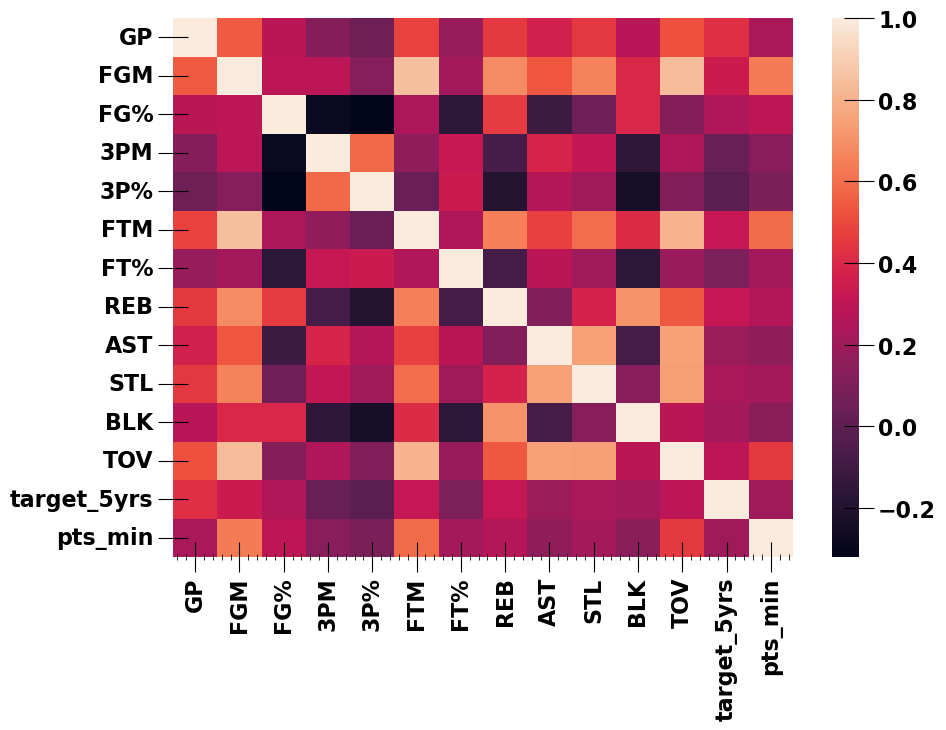

In [24]:
df_corr=df_clean.drop(columns='Name')
plt.figure(figsize=(10,7))
df_corr = df_corr.corr()
sns.heatmap(df_corr)

Suivant le sport en géneral, je sais qu'au basket on parle souvent de double double ou triple double quand un joueur
à des stats à 2 chiffres dans 2 domaines différents (e.g. PTS et AST). En regardant sur internet, j'ai trouvé cette formule de l'efficacité qui incluant les principales stats d'un joueur. Inventé par Martin Manley (source Wikipedia).

    (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP

Dans notre cas, toutes les valeurs PTS, REB, AST, STL, MissedFG, Missed FT, TO sont en décimals donc j'en déduis que c'est la statistique par matchs joués, donc on ne va pas diviser par GP.


In [25]:
df_clean

,Name,GP,FGM,FG%,3PM,3P%,FTM,FT%,REB,AST,STL,BLK,TOV,target_5yrs,pts_min
0,Brandon Ingram,36,2.6,34.7,0.5,25.0,1.6,69.9,4.1,1.9,0.4,0.4,1.3,0.0,0.270073
1,Andrew Harrison,35,2.0,29.6,0.7,23.5,2.6,76.5,2.4,3.7,1.1,0.5,1.6,0.0,0.267658
2,JaKarr Sampson,74,2.0,42.2,0.4,24.4,0.9,67.0,2.2,1.0,0.5,0.3,1.0,0.0,0.339869
3,Malik Sealy,58,2.3,42.6,0.1,22.6,0.9,68.9,1.9,0.8,0.6,0.1,1.0,1.0,0.491379
4,Matt Geiger,48,1.6,52.4,0.0,0.0,1.3,67.4,2.5,0.3,0.3,0.4,0.8,1.0,0.391304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Byron Houston,79,1.8,44.6,0.0,28.6,1.6,66.5,4.0,0.9,0.6,0.5,1.1,0.0,0.329193
1336,Brent Price,68,1.5,35.8,0.1,16.7,0.8,79.4,1.5,2.3,0.8,0.0,1.3,1.0,0.309524
1337,Marlon Maxey,43,2.2,55.0,0.0,0.0,1.0,64.3,3.8,0.3,0.3,0.4,0.9,0.0,0.446281
1338,Litterial Green,52,1.7,43.9,0.0,10.0,1.2,62.5,0.7,2.2,0.4,0.1,0.8,1.0,0.375000


<Axes: >

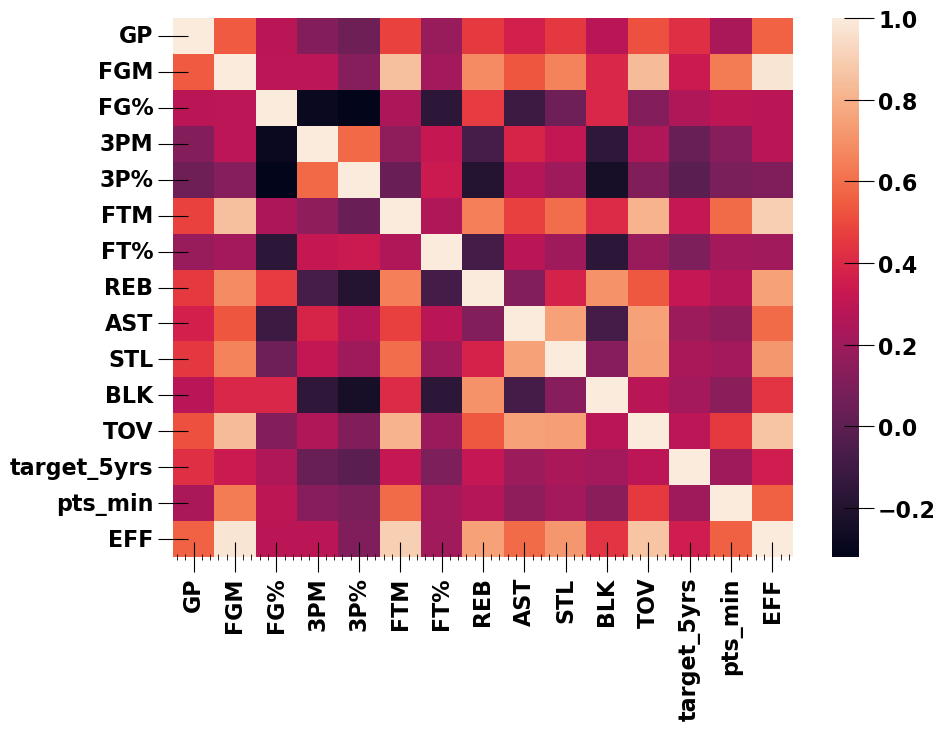

In [26]:
df_clean['EFF']=df.PTS+df.REB+df.AST+df.STL-df.TOV-(df.FGM*(1/df['FG%']-1))-(df.FTM*(1/df['FT%']-1))
df_corr=df_clean.drop(columns='Name')
plt.figure(figsize=(10,7))
df_corr = df_corr.corr()
sns.heatmap(df_corr)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 2000x600 with 0 Axes>

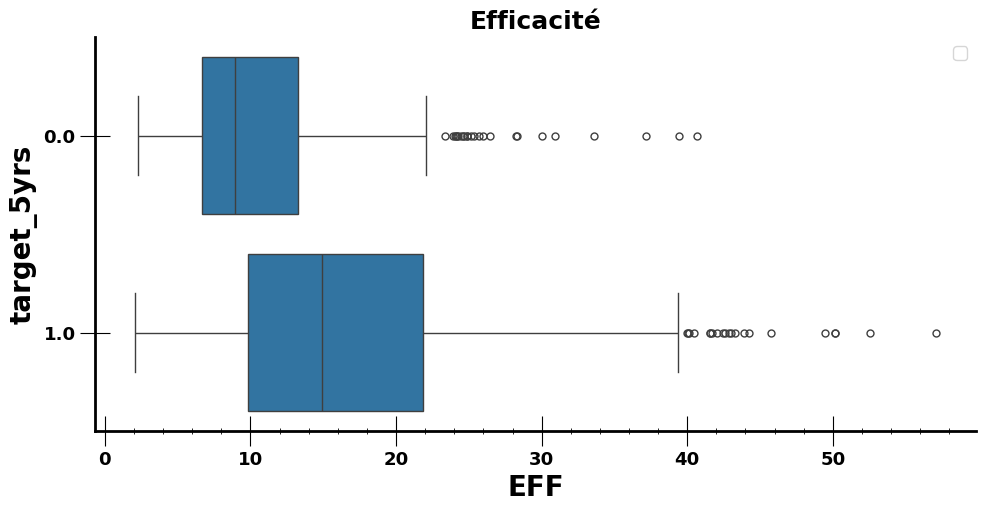

In [27]:
plt.figure(figsize=(20,6))
sns.catplot(kind='box', x='EFF', y='target_5yrs', orient='h', data=df_clean, aspect=2);
plt.title('Efficacité', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)
# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Modelling:

Le but est de créer un classfier pour savoir si le joueur jouera ou non plus de 5 an

Tout d'abord, je vais copier coller tout ce que j'ai fait précédement pour repartir de données brutes

Ensuite je vais créer une pipeline pour scaler les fetaures, tester différent modèles et faire une cross validation.


Finalement, je vais hypertuner mon modèle le plus performant.


**Modeles**

Comme c'est une classification binaire, je vais essayer comme modèle la regression logistique.  La régression logistique utilise une fonction sigmoïde pour transformer les prédictions linéaires en probabilités. Après on place un threshold dans les probabilité pour dire si cela appartient à 0 ou 1. En général on utilise 0.5.

Je vais aussi tester le Random Forest. Cet algorithme est robuste aux outliers, colinearité et nous permet aussi d'extraire l'importance des futures. Il est aussi robuste à l'overfitting contrairement aux  arbres de décisions.

**Metriques**. 

Plusieurs métriques sont utilisées en classification telles que l'accuracy, recall, precision, specificity, courbe ROC-AUC, F1, matrix de confusion. L'utilisation des métriques dépend du problème. 

Ici, l'objectif est de fournir un classifier permettant de prédire qu’un joueur vaut le coup d’investir sur lui car il va durer plus de 5 ans en NBA. C'est à dire qu'on veut une grande précison sur la détection de >5yrs, donc des true positives.

Pour cela, le recall qui mesure la proportion de vrais positifs détectés parmi tous les exemples réellement positifs est très utiles quand
les faux négatifs doivent être minimisés.

La precision aussi est importante car on veut minimiser les faux positifs qui pourraient très couteux aux investisseurs.

Du coup, on va aussi regarder la courbe precision-recall.

Finalement, on peut va regarder l'accuracy pour avoir une idée globale de notre modèle et la matrix de confusion.







### Data cleaning

In [28]:
def load_data():

    #load dataset brute
    df = pd.read_csv("nba_logreg.csv")
    #Enleve les valeurs manquantes
    df=df.dropna()
    #Enleve les valeurs dupliquées
    df=df.rename(columns={'TARGET_5Yrs': 'target_5yrs', '3P Made': '3PM'})  
    duplicate = df.drop(columns=['target_5yrs']).duplicated(keep=False)
    indices_to_remove = df[duplicate].index
    df=df.drop(index=indices_to_remove)

    #Enleve les features correlées et ajoute l'efficacité
    df_clean=df.drop(columns=df.filter(regex='A$').columns)
    df_clean['pts_min']=df_clean.PTS/df_clean.MIN
    df_clean=df_clean.drop(columns=['PTS','DREB','OREB'])
    df_clean=df
    df_clean['EFF']=df.PTS+df.REB+df.AST+df.STL-df.TOV-(df.FGM*(1/df['FG%']-1))-(df.FTM*(1/df['FT%']-1))   
    #Enleve les valeurs manquantes
    df_clean=df_clean.dropna()
    #Separe noms, fetaures, target
    X,y,name_ply=df_clean.drop(columns=['Name','target_5yrs'],axis=1),df_clean['target_5yrs'],df_clean['Name']
    #Noms des features numériques auxquelles on appliquera le scaling 
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns

    return X,y,num_ix,name_ply,df_clean

In [29]:
X,y,num_ix,name_ply,df=load_data()
num_ix

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'EFF'],
      dtype='object')

### Create pipeline

In [30]:
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold,GridSearchCV, train_test_split
from sklearn.feature_selection import RFE,SelectFromModel
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, recall_score, roc_auc_score, roc_curve, auc,precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [31]:
#Metrique pour évaluer le modèle
'''
Changement de la fonction score_classifier:

Cross validation, j'utilise RepeatedStratifiedKFold car on veut que les
proportions des targets soient maintenues dans chaque fold (60/40) pour
ne pas unbalanced les données

Aussi j'ajoute un set de validation. Je prends mes données et je les sépare
en train et test. Les données test ne seront jamais touchées durant le training.

Les données train, je fais une cross validation donc j'ai des données train et valid

J'ajoute aussi la précision comme information.

Je vais avoir tous les résultats pour l'entrainement mais aussi pour les données vierges du test.
Je pourrais savoir si mon modèle performe pareil avec des données toutes nouvelles.

'''
n_splits = 3
n_repeats = 3
cv = RepeatedStratifiedKFold(n_splits=n_splits , n_repeats=n_repeats , random_state=1)

def score_classifier(X_train, y_train, X_test, y_test, model):
	total_conf_matrix_train = np.zeros((2, 2))  # Adjust shape for multi-class
	recall_scores_train = []
	precision_scores_train = []

	for train_ix, test_ix in cv.split(X_train, y_train):
		# Split the data (on the training data only)
		X_train_cv, X_valid_cv = X_train.iloc[train_ix], X_train.iloc[test_ix]
		y_train_cv, y_valid_cv = y_train.iloc[train_ix], y_train.iloc[test_ix]

		# On fit le modele sur les données train
		model.fit(X_train_cv, y_train_cv)

		# prediction sur les données de validation, on évalue le modèle
		y_pred_cv = model.predict(X_valid_cv)

		# Matrice de confusion pour ce fold
		conf_matrix_cv = confusion_matrix(y_valid_cv, y_pred_cv)
		total_conf_matrix_train += conf_matrix_cv

		# Recall et precision pour ce fold
		recall_cv = recall_score(y_valid_cv, y_pred_cv)
		precision_cv = precision_score(y_valid_cv, y_pred_cv)

		recall_scores_train.append(recall_cv)
		precision_scores_train.append(precision_cv)

	# Moyenne des metriques
	mean_recall_train = np.mean(recall_scores_train)	
	std_recall_train = np.std(recall_scores_train)

	avg_conf_matrix_train = total_conf_matrix_train/n_repeats 
	avg_conf_matrix_train = np.round(avg_conf_matrix_train).astype(int)
    
	mean_precision_train = np.mean(precision_scores_train)
	std_precision_train = np.std(precision_scores_train)

	# Evaluation du modele sur des données vierges
	y_pred_test = model.predict(X_test)
	conf_matrix_test = confusion_matrix(y_test, y_pred_test)
	recall_test = recall_score(y_test, y_pred_test)
	precision_test = precision_score(y_test, y_pred_test)

	return (avg_conf_matrix_train, mean_recall_train, std_recall_train, mean_precision_train, std_precision_train, 
	conf_matrix_test, recall_test, precision_test)


In [32]:
# Les modèles que l'on va tester

def get_models():
	models, names = list(), list()
	# Logistic regression
	models.append(LogisticRegression())
	names.append('LR')
	# RF
	models.append(RandomForestClassifier())
	names.append('RF')   
	# SVM
	models.append(SVC(gamma='scale'))
	names.append('SVM')  
	return models, names

######################        LR         ##################################
Training Performance pour modèle LR:
Average Confusion Matrix (Train):
[[173 160]
 [ 95 461]]
Mean Recall (Train): 0.829 (±0.034)
Mean Precision (Train): 0.742 (±0.008)

Performance sur données test (vierge):
Recall (Test): 0.833
Precision (Test): 0.774
###############################################################################


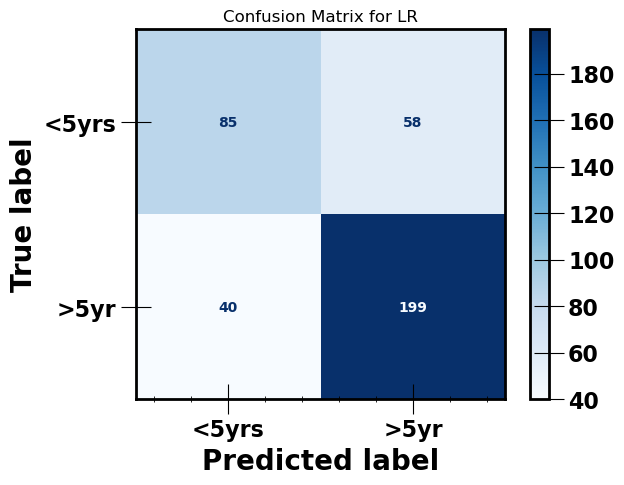

######################        RF         ##################################
Training Performance pour modèle RF:
Average Confusion Matrix (Train):
[[177 156]
 [118 438]]
Mean Recall (Train): 0.787 (±0.024)
Mean Precision (Train): 0.737 (±0.012)

Performance sur données test (vierge):
Recall (Test): 0.820
Precision (Test): 0.766
###############################################################################


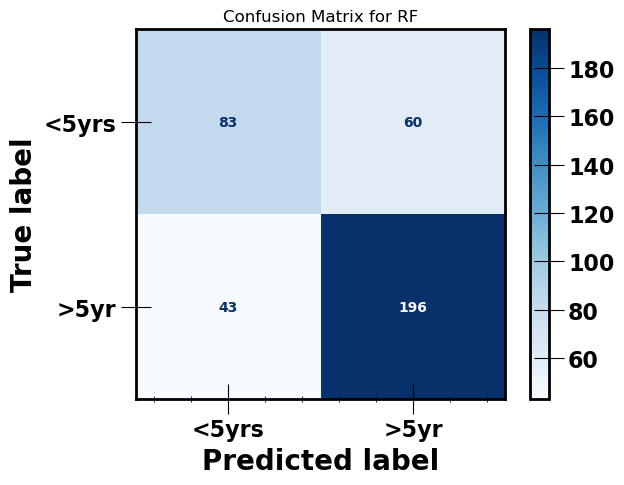

######################        SVM         ##################################
Training Performance pour modèle SVM:
Average Confusion Matrix (Train):
[[181 152]
 [104 452]]
Mean Recall (Train): 0.814 (±0.029)
Mean Precision (Train): 0.748 (±0.008)

Performance sur données test (vierge):
Recall (Test): 0.808
Precision (Test): 0.775
###############################################################################


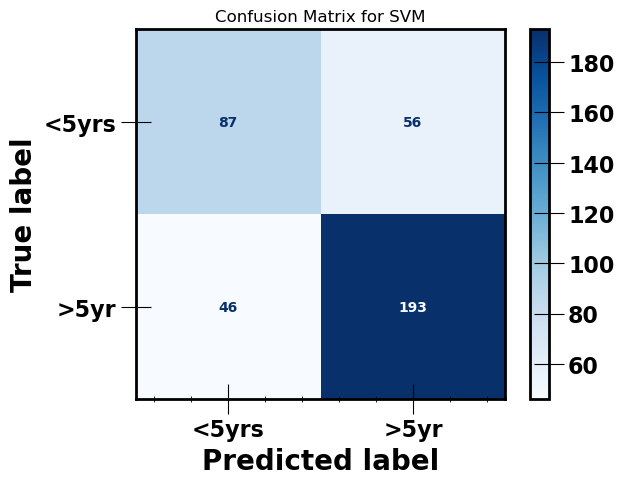

In [33]:
#get data
X,y,num_ix,name_ply,df=load_data()
# Definition des modèles
models, names = get_models()

# Split the data itraining and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
# evaluate each model
for mod in range(len(models)):
	# On definit les étapes pour transformer les données, ici on the fera que normaliser
	steps = [('n',MinMaxScaler(),num_ix)]

	# On transforme et fit en utilisant un modèle
	pipeline = Pipeline(steps=[('t',ColumnTransformer(steps)),('m',models[mod])])

	#On fit les données train et on entrain des 
	avg_conf_matrix_train, mean_recall_train, std_recall_train, mean_precision_train, std_precision_train, conf_matrix_test, recall_test, precision_test=score_classifier(X_train, y_train, X_test, y_test, pipeline)



	# Print the results for training
	print("######################        %s         ##################################"%names[mod]) 
    
	print("Training Performance pour modèle %s:"%names[mod])
	print(f"Average Confusion Matrix (Train):\n{avg_conf_matrix_train}")
	print(f"Mean Recall (Train): {mean_recall_train:.3f} (±{std_recall_train:.3f})")
	print(f"Mean Precision (Train): {mean_precision_train:.3f} (±{std_precision_train:.3f})")

	print("\nPerformance sur données test (vierge):")
	print(f"Recall (Test): {recall_test:.3f}")
	print(f"Precision (Test): {precision_test:.3f}") 
	print("###############################################################################") 
	# Display the confusion matrix
	disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=["<5yrs", ">5yr"])  # Adjust labels if needed
	disp.plot(cmap=plt.cm.Blues)
	plt.title(f'Confusion Matrix for {names[mod]}')
	plt.show()



**Conclusions** Notre modele regression logisitque a de bon résultat, on va donc garde celui ci. On voit aussi que les performances sont similaires lors du training ou sur des données nouvelles (test).

### Regardons l'importance des features

In [34]:
model = LogisticRegression()

# On definit les étapes pour transformer les données, ici on the fera que normaliser
steps = [('n',MinMaxScaler(),num_ix)]

# On transforme et fit en utilisant un modèle
pipeline = Pipeline(steps=[('t',ColumnTransformer(steps)),('m',model)])


pipeline.fit(X_train, y_train)

importance = pd.Series(pipeline.named_steps['m'].coef_[0], index=X_train.columns)
importance = importance.sort_values(ascending=False)

print(importance)



GP      2.165081
BLK     1.258986
OREB    1.084736
AST     1.070075
FT%     0.961298
FTM     0.876445
FG%     0.840537
EFF     0.785868
FTA     0.648567
REB     0.621554
PTS     0.542200
FGM     0.335413
3P%     0.242441
DREB    0.224915
3PM     0.197706
FGA    -0.031543
TOV    -0.042232
STL    -0.288017
3PA    -0.622083
MIN    -0.687364
dtype: float64


/tmp/ipykernel_1903324/1441172396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.values, y=importance.index, palette='viridis')


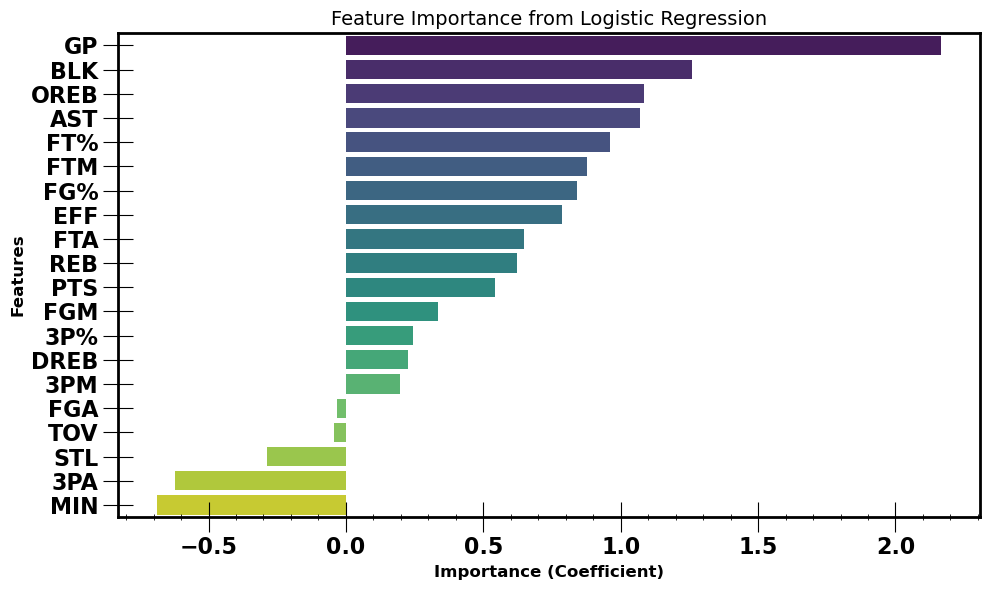

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importance.values, y=importance.index, palette='viridis')

plt.title('Feature Importance from Logistic Regression', fontsize=14)
plt.xlabel('Importance (Coefficient)', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

### Lets take the 10 more important features and redo our model evaluation

######################        LR         ##################################
Training Performance pour modèle LR:
Average Confusion Matrix (Train):
[[168 165]
 [ 91 465]]
Mean Recall (Train): 0.836 (±0.032)
Mean Precision (Train): 0.738 (±0.008)

Performance sur données test (vierge):
Recall (Test): 0.837
Precision (Test): 0.775
###############################################################################


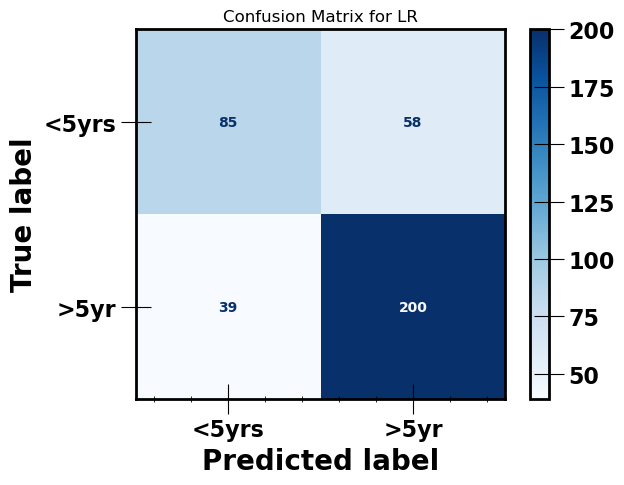

######################        RF         ##################################
Training Performance pour modèle RF:
Average Confusion Matrix (Train):
[[174 159]
 [119 437]]
Mean Recall (Train): 0.787 (±0.030)
Mean Precision (Train): 0.733 (±0.018)

Performance sur données test (vierge):
Recall (Test): 0.812
Precision (Test): 0.773
###############################################################################


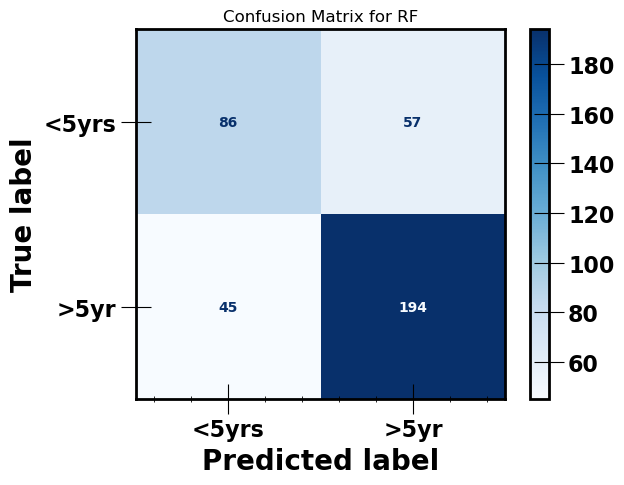

######################        SVM         ##################################
Training Performance pour modèle SVM:
Average Confusion Matrix (Train):
[[178 155]
 [102 454]]
Mean Recall (Train): 0.817 (±0.029)
Mean Precision (Train): 0.746 (±0.013)

Performance sur données test (vierge):
Recall (Test): 0.820
Precision (Test): 0.772
###############################################################################


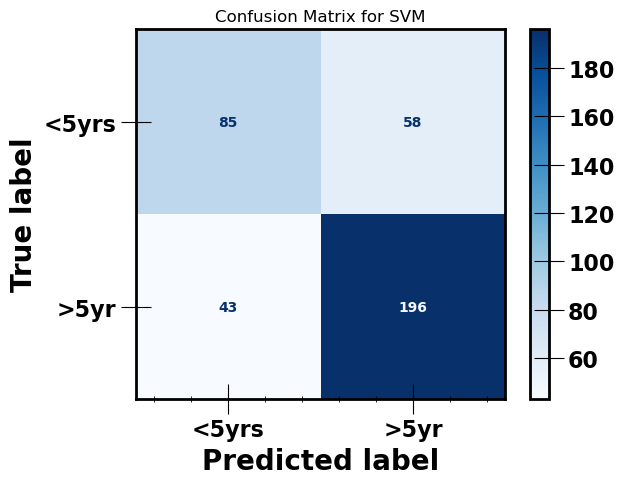

In [36]:
top_10_features = importance.abs().sort_values(ascending=False).head(10)

#get data
X,y,num_ix,name_ply,df=load_data()

X=X[top_10_features.index]
num_ix=top_10_features.index
# Definition des modèles
models, names = get_models()

# Split the data itraining and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
# evaluate each model
for mod in range(len(models)):
	# On definit les étapes pour transformer les données, ici on the fera que normaliser
	steps = [('n',MinMaxScaler(),num_ix)]

	# On transforme et fit en utilisant un modèle
	pipeline = Pipeline(steps=[('t',ColumnTransformer(steps)),('m',models[mod])])

	#On fit les données train et on entrain des 
	avg_conf_matrix_train, mean_recall_train, std_recall_train, mean_precision_train, std_precision_train, conf_matrix_test, recall_test, precision_test=score_classifier(X_train, y_train, X_test, y_test, pipeline)



	# Print the results for training
	print("######################        %s         ##################################"%names[mod]) 
    
	print("Training Performance pour modèle %s:"%names[mod])
	print(f"Average Confusion Matrix (Train):\n{avg_conf_matrix_train}")
	print(f"Mean Recall (Train): {mean_recall_train:.3f} (±{std_recall_train:.3f})")
	print(f"Mean Precision (Train): {mean_precision_train:.3f} (±{std_precision_train:.3f})")

	print("\nPerformance sur données test (vierge):")
	print(f"Recall (Test): {recall_test:.3f}")
	print(f"Precision (Test): {precision_test:.3f}") 
	print("###############################################################################") 
	# Display the confusion matrix
	disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=["<5yrs", ">5yr"])  # Adjust labels if needed
	disp.plot(cmap=plt.cm.Blues)
	plt.title(f'Confusion Matrix for {names[mod]}')
	plt.show()

### Hypertune notre modèle (LR)

Les hyperparametres pour la LR:

-> penalty: régularisation Lasso, régularisation Ridge, les deux, aucune


-> C: Paramètre de régularisation inverse. Plus C est grand, moins la régularisation est forte.

Ici je montre juste un exemple de comment utiliser params_grid juste sur quelques hyperparametres

Les métriques sont très similaires à celle lorsqu'on utilse toutes les données, on peut alors se limiter à ces 10 features, le modèle sera plus simple.

In [37]:
importance.abs().sort_values(ascending=False).head(10)

GP      2.165081
BLK     1.258986
OREB    1.084736
AST     1.070075
FT%     0.961298
FTM     0.876445
FG%     0.840537
EFF     0.785868
MIN     0.687364
FTA     0.648567
dtype: float64

In [38]:

top_10_features = importance.abs().sort_values(ascending=False).head(10)

#data
X,y,num_ix,name_ply,df=load_data()

X=X[top_10_features.index]
num_ix=top_10_features.index
print("Features choisies pour notre modèle (10 en tout): ", num_ix)

steps = [('n', MinMaxScaler(), num_ix)]
ct = ColumnTransformer(steps)

# notre modele
lr = LogisticRegression()  

pipeline = Pipeline(steps=[
    ('t', ct), 
    ('m', lr)
])

# grille des hyperparametres
params_grid = [
    {
        'm__penalty': ['l2'],  
        'm__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'm__solver': ['newton-cg', 'lbfgs', 'sag'],
        'm__class_weight': [None, 'balanced']
    }
]
#cross validation:
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)


# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, params_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)


# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)


Features choisies pour notre modèle (10 en tout):  Index(['GP', 'BLK', 'OREB', 'AST', 'FT%', 'FTM', 'FG%', 'EFF', 'MIN', 'FTA'], dtype='object')
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found:  {'m__C': 10, 'm__class_weight': None, 'm__penalty': 'l2', 'm__solver': 'lbfgs'}


/home/tdejaege/anaconda3/envs/lemaitre/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/tdejaege/anaconda3/envs/lemaitre/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/tdejaege/anaconda3/envs/lemaitre/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/tdejaege/anaconda3/envs/lemaitre/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/tdejaege/anaconda3/envs/lemaitre/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  

Matthews correlation coefficient: 0.431
Test set accuracy: 0.741
Test set precision: 0.765
Test set recall: 0.845
Test set ROC-AUC: 0.787


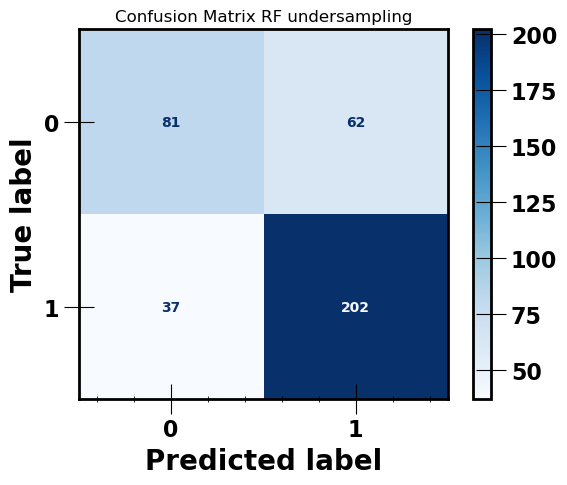

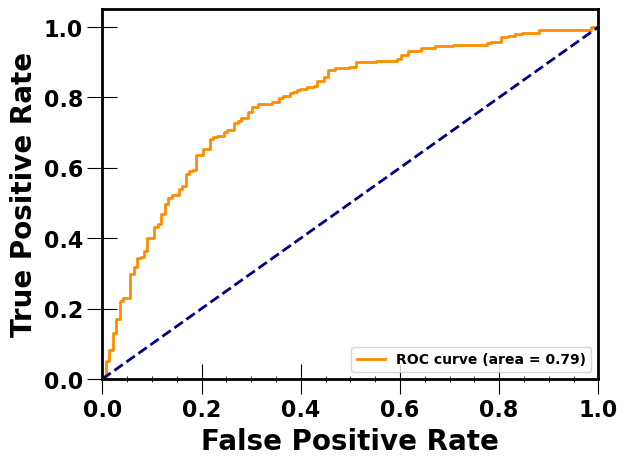

Test set PR-AUC: 0.837


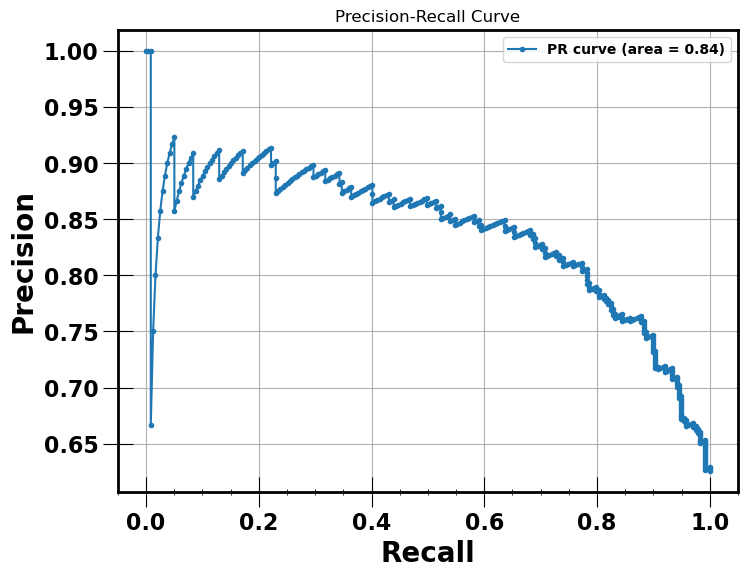

In [39]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# On peut changer le seuil
threshold = 0.5
y_pred = np.where(y_pred_proba > threshold, 1, 0)  # Appliquer le seuil


# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

#MCC
from sklearn.metrics import confusion_matrix, matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews correlation coefficient: {:.3f}".format(mcc))

# Print the evaluation metrics
print("Test set accuracy: {:.3f}".format(accuracy))
print("Test set precision: {:.3f}".format(precision))
print("Test set recall: {:.3f}".format(recall))
print("Test set ROC-AUC: {:.3f}".format(roc_auc))

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix RF undersampling')
plt.show()

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_value)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import auc,precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print("Test set PR-AUC: {:.3f}".format(pr_auc))

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.',label='PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

**Conclusions** Nous avons une obtenu une accuracy de 74.1%, c'est à dire que 74,1 % des prédictions faites  sont correctes. De plus notre modèle a une precision de 76.5%, i.e. si le modèle prédit qu'un joueur jouera plus de 5 ans, il a raison 76,5 % du temps. Finalement,
le recall est de 0.845, c'est à dire que le modèle identifie 84,5 % des joueurs qui ont effectivement joué plus de 5 ans. 
.

In [40]:
import joblib
# Save the best model to a file
joblib.dump(best_model, 'nba_prediction_LR.pkl')

['nba_prediction_LR.pkl']

### Test sur des données inventées.

On prend une valeur aléatoire pour chaque features en assumant une distribution gaussienne


In [41]:
#On charge le modèle:
classifier = joblib.load('nba_prediction_LR.pkl')

In [42]:
#On crée un faux joueur on ne prenant que les 10 features dont on a besoin
features = ['GP', 'BLK', 'OREB', 'AST', 'FT%', 'FTM', 'FG%', 'EFF', 'MIN', 'FTA']
# Créer un faux joueur avec des valeurs aléatoires réalistes
fake_player = pd.DataFrame({
    'GP': [np.random.normal(loc=df['GP'].mean(), scale=df['GP'].std())],        
    'BLK': [np.random.normal(loc=df['BLK'].mean(), scale=df['BLK'].std())],          
    'OREB': [np.random.normal(loc=df['OREB'].mean(), scale=df['OREB'].std())],         
    'AST': [np.random.normal(loc=df['AST'].mean(), scale=df['AST'].std())],         
    'FT%': [np.random.normal(loc=df['FT%'].mean(), scale=df['FT%'].std())],     
    'FTM': [np.random.normal(loc=df['FTM'].mean(), scale=df['FTM'].std())],         
    'FG%': [np.random.normal(loc=df['FG%'].mean(), scale=df['FG%'].std())],      
    'EFF': [np.random.normal(loc=df['EFF'].mean(), scale=df['EFF'].std())],        
    'MIN': [np.random.normal(loc=df['MIN'].mean(), scale=df['MIN'].std())],         
    'FTA': [np.random.normal(loc=df['FTA'].mean(), scale=df['FTA'].std())]          
})

X_new = fake_player

# Prédiction
y_pred_new = classifier.predict(X_new)

# Résultat
if y_pred_new==0:
    print('Ce joueur jouera moins de 5 ans en NBA')
else:
    print('Ce joueur jouera plus de 5 ans en NBA')

Ce joueur jouera plus de 5 ans en NBA


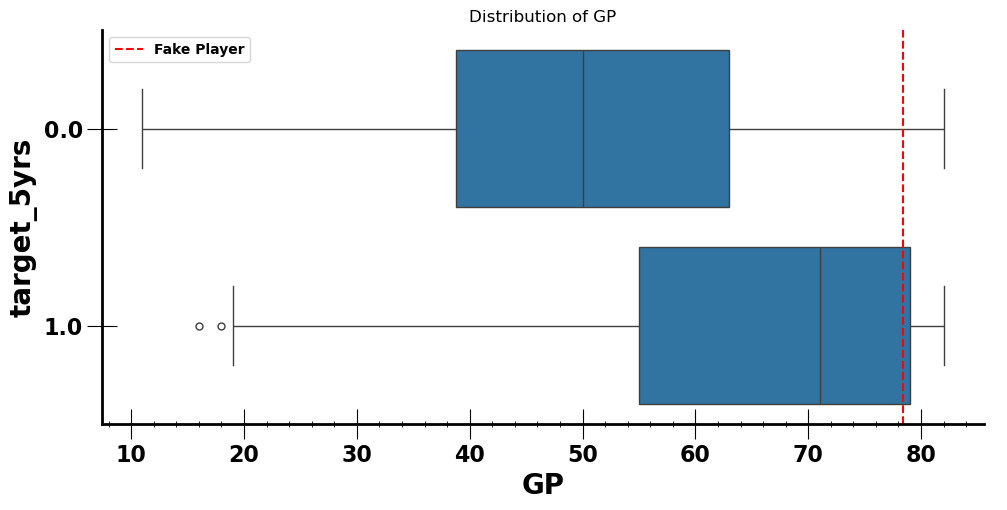

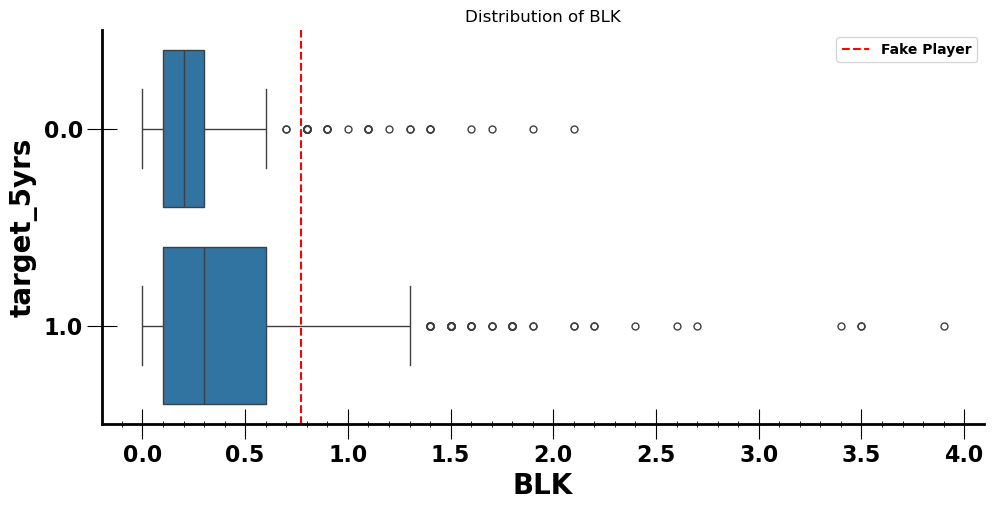

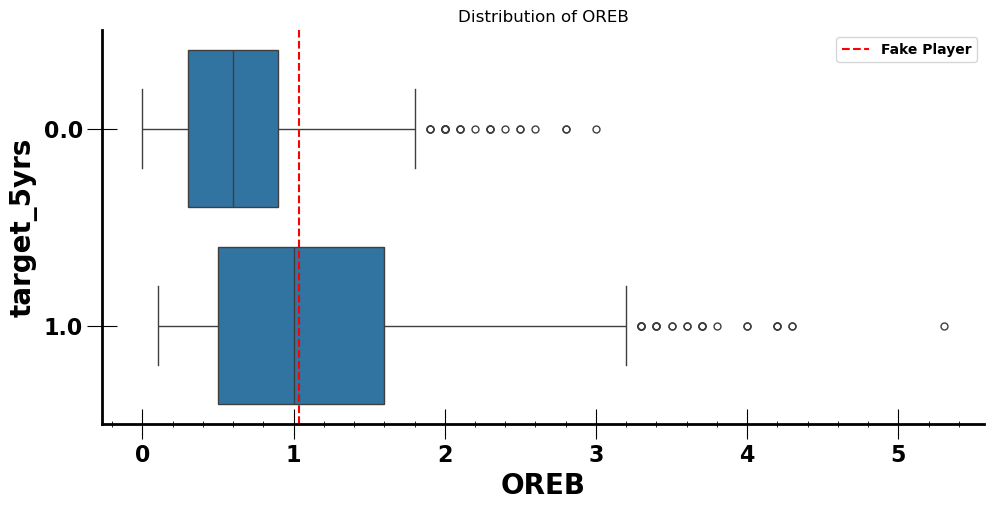

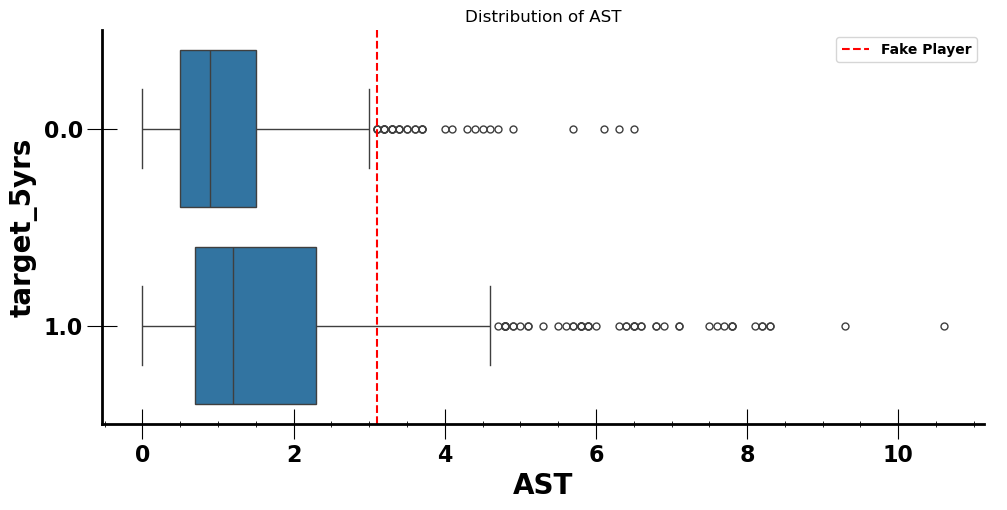

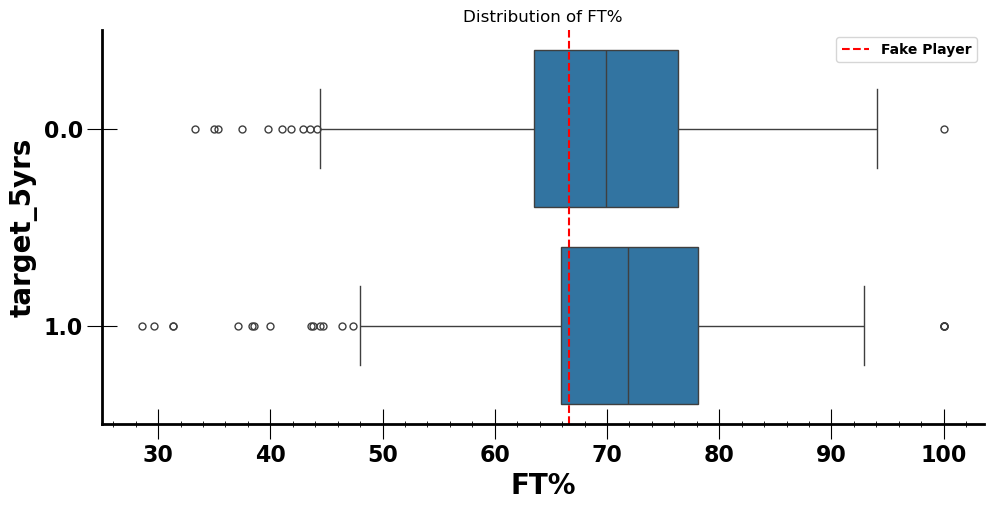

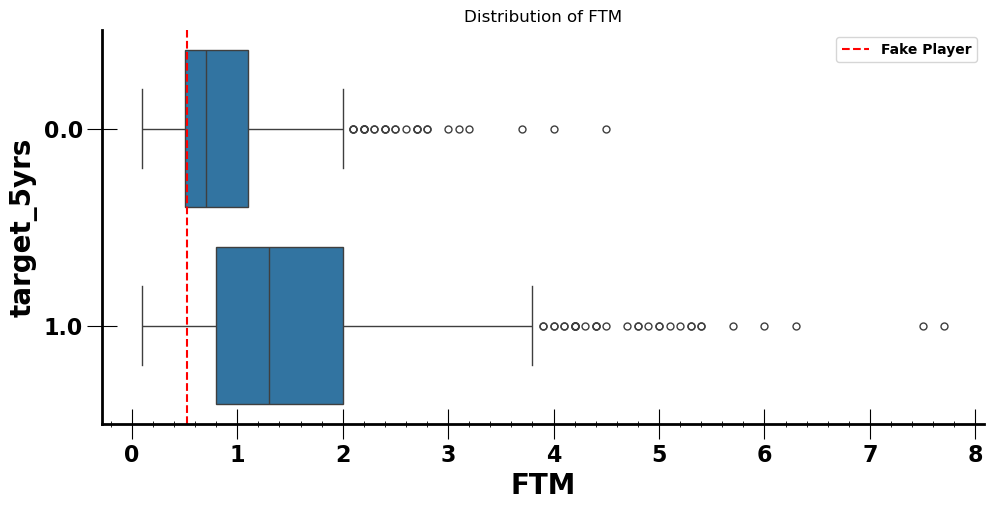

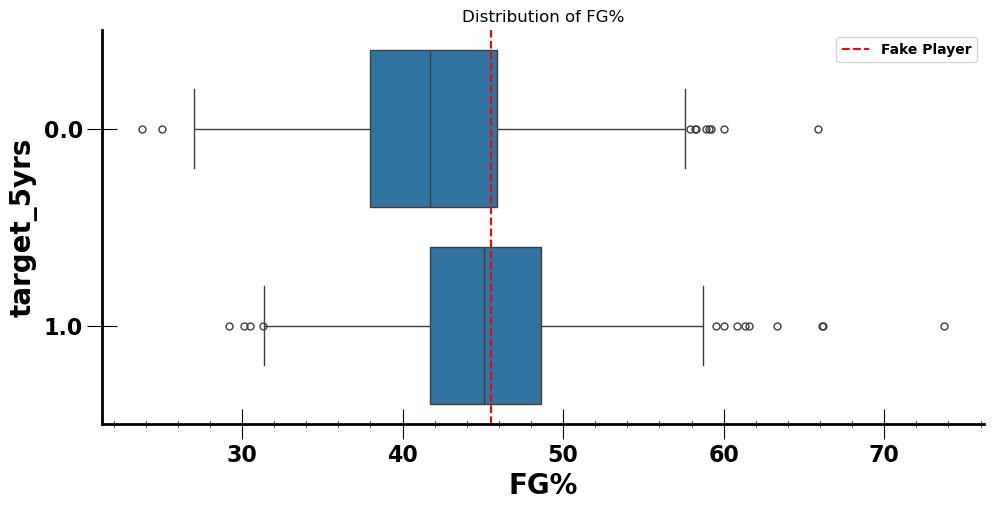

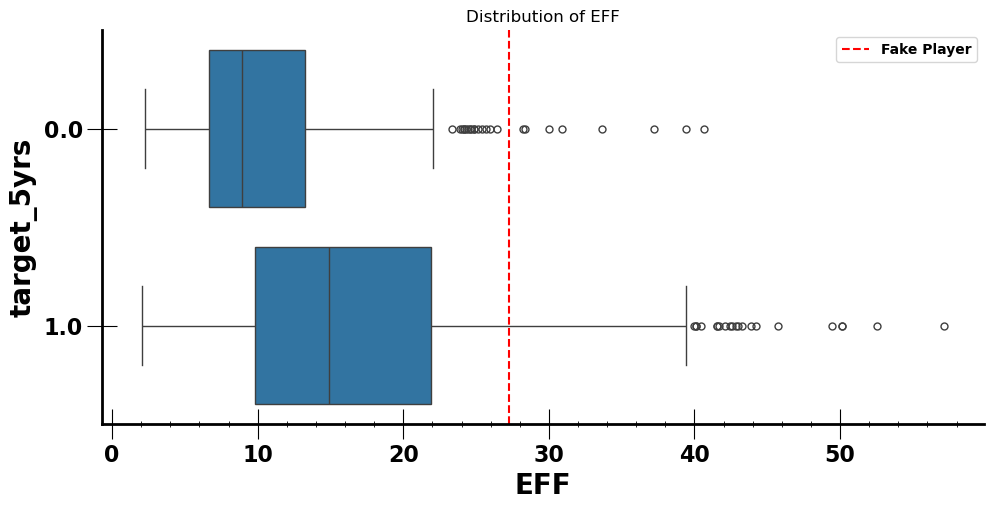

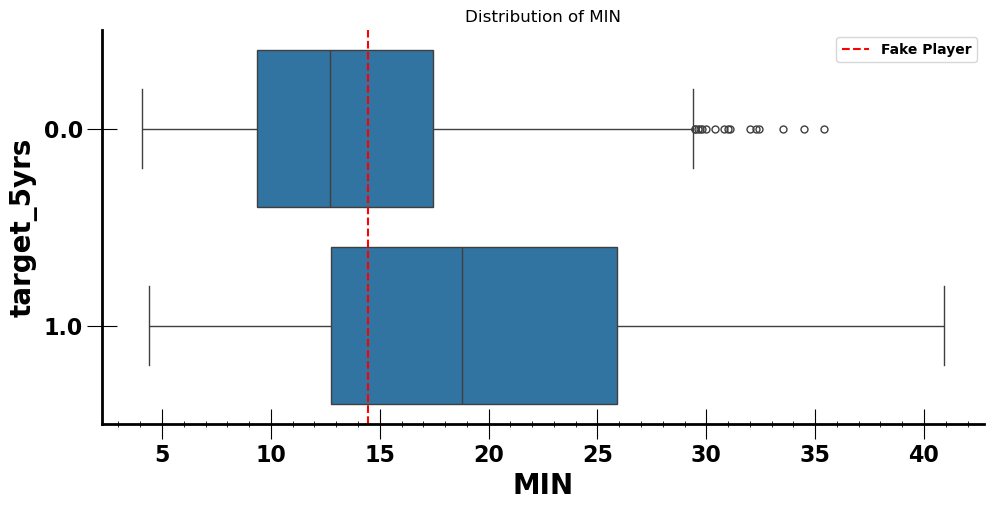

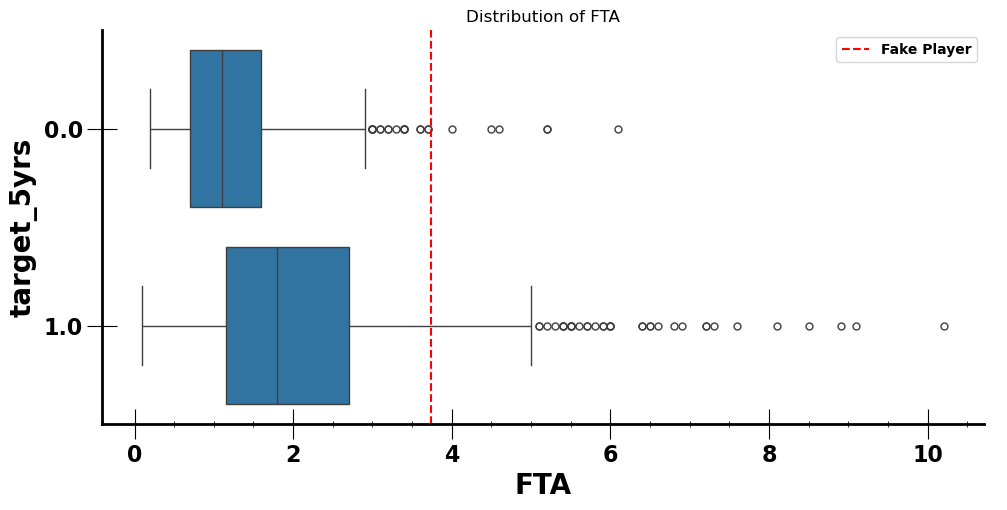

In [43]:
for i, feature in enumerate(features):
    sns.catplot(kind='box', x=feature, y='target_5yrs', orient='h', data=df, aspect=2);
    plt.title('%s'%feature, fontsize=18, fontweight='bold')    
    plt.axvline(x=X_new[feature].values[0], color='red', linestyle='--', label='Fake Player')
    plt.title(f'Distribution of {feature}')
    plt.legend()
